In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("Sport car price.csv")
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [312]:
car_prices_df = car_prices_df.replace('', np.nan)  # Replace empty strings
car_prices_df = car_prices_df.dropna()  # Drop rows with missing values

car_prices_df = df[["Year", "Horsepower", "Torque (lb-ft)", "0-60 MPH Time (seconds)", "Price (in USD)"]]
car_prices_df.loc[:, "Price (in USD)"] = car_prices_df["Price (in USD)"].str.replace(',', '', regex=True)
car_prices_df.loc[:, "Torque (lb-ft)"] = car_prices_df["Torque (lb-ft)"].str.replace(',', '', regex=True)
car_prices_df.loc[:, "Torque (lb-ft)"] = car_prices_df["Torque (lb-ft)"].str.replace(r'\-', '', regex=True)
car_prices_df.loc[:, "Horsepower"] = car_prices_df["Horsepower"].str.replace(r'\+', '', regex=True)
car_prices_df.loc[:, "Horsepower"] = car_prices_df["Horsepower"].str.replace(',', '', regex=True)
car_prices_df = car_prices_df.dropna() 	

numeric_df = car_prices_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr(method="pearson")
print(correlation_matrix)

      Year
Year   1.0


In [313]:
numeric_df = car_prices_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN (non-float values)
float_only_df = numeric_df.dropna()
float_only_df.corr(method="pearson")

,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Year,1.000000,0.028412,0.029466,-0.010357,-0.030991
Horsepower,0.028412,1.000000,0.760641,-0.503862,0.457226
Torque (lb-ft),0.029466,0.760641,1.000000,-0.560113,0.545823
0-60 MPH Time (seconds),-0.010357,-0.503862,-0.560113,1.000000,-0.505649
Price (in USD),-0.030991,0.457226,0.545823,-0.505649,1.000000


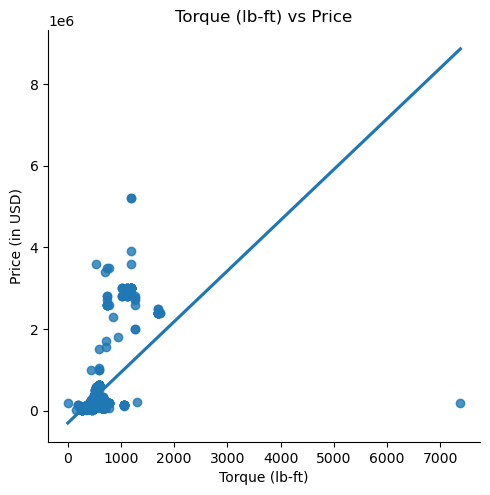

In [314]:
sns.lmplot(x='Torque (lb-ft)', y='Price (in USD)', data=float_only_df, ci = None)
plt.title('Torque (lb-ft) vs Price')
plt.show()

<Axes: ylabel='Frequency'>

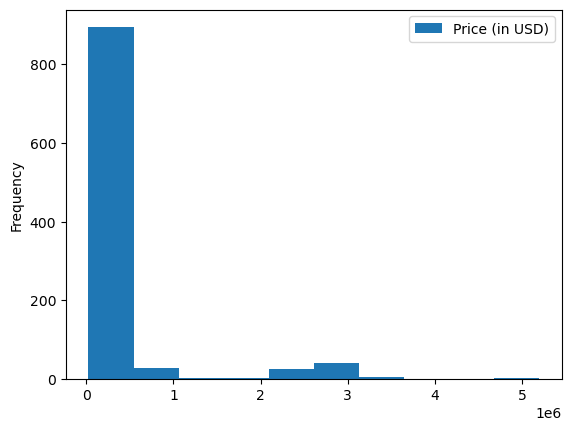

In [315]:
float_only_df.plot.hist(y="Price (in USD)")

<Axes: ylabel='Frequency'>

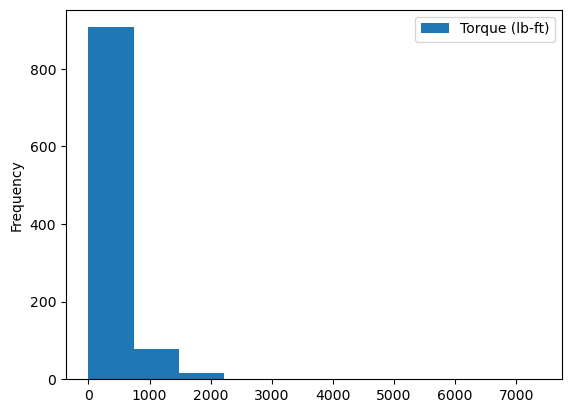

In [316]:
float_only_df.plot.hist(y="Torque (lb-ft)")

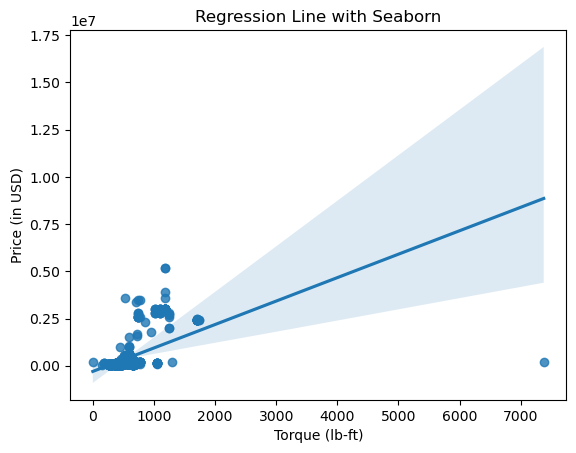

Regression Equation: y = 1241.4697696387923x + -299574.2285947935


In [317]:


# Create a seaborn scatter plot with regression line
sns.regplot(x=float_only_df['Torque (lb-ft)'], y=float_only_df['Price (in USD)'], line_kws=None)

# Display the plot
plt.title('Regression Line with Seaborn')
plt.show()

# Get the slope and intercept using np.polyfit (or scikit-learn)
slope, intercept = np.polyfit(float_only_df['Torque (lb-ft)'],float_only_df['Price (in USD)'], 1)
print(f"Regression Equation: y = {slope}x + {intercept}")

In [318]:
test = float_only_df[float_only_df["Price (in USD)"] >= 300000].copy()
train = float_only_df[float_only_df["Price (in USD)"] < 300000].copy() 
test.shape


(223, 5)

In [319]:
train.shape

(778, 5)

In [320]:
reg = LinearRegression()

In [331]:
valuepredictors = ["Torque (lb-ft)", "0-60 MPH Time (seconds)", 'Horsepower']
target = "Price (in USD)"

reg.fit(train[valuepredictors],train["Price (in USD)"])
predictions=reg.predict(test[valuepredictors])

test["predictions"] = predictions
test

,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),predictions
2,2022,661,561.0,3.00,333750,161832.346784
11,2021,1500,1180.0,2.40,3000000,190644.904722
14,2021,1280,1015.0,2.50,2800000,186320.785157
24,2021,720,737.0,2.80,2800000,170525.236092
26,2022,1914,1696.0,1.85,2400000,215631.507245
...,...,...,...,...,...,...
1002,2022,1280,1106.0,2.50,3000000,184871.901932
1003,2021,1972,1254.0,2.00,2000000,214693.651537
1004,2021,789,590.0,2.70,1000000,178862.878610
1005,2021,764,738.0,3.00,2600000,159664.983326


In [333]:
test["predictions"]=test["predictions"].round()

In [335]:
test


,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),predictions
2,2022,661,561.0,3.00,333750,161832.0
11,2021,1500,1180.0,2.40,3000000,190645.0
14,2021,1280,1015.0,2.50,2800000,186321.0
24,2021,720,737.0,2.80,2800000,170525.0
26,2022,1914,1696.0,1.85,2400000,215632.0
...,...,...,...,...,...,...
1002,2022,1280,1106.0,2.50,3000000,184872.0
1003,2021,1972,1254.0,2.00,2000000,214694.0
1004,2021,789,590.0,2.70,1000000,178863.0
1005,2021,764,738.0,3.00,2600000,159665.0


In [337]:
error = mean_absolute_error(test['Price (in USD)'], test['predictions'])

In [339]:
error

1123562.8968609865